In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-08-28 09:58:32.956797: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 09:58:33.001718: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 09:58:33.003061: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 09:58:33.853504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

# Loading Images

In [3]:
from tensorflow.keras.preprocessing.image import load_img 

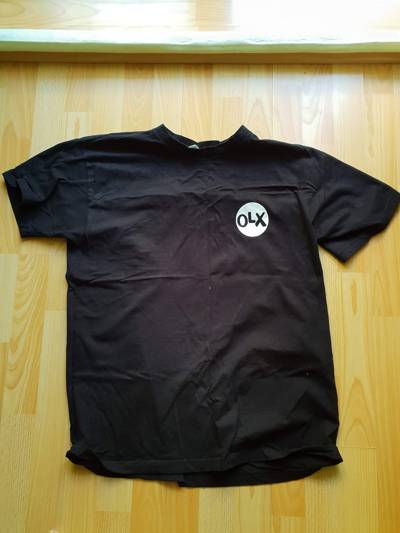

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = path + '/' + name
load_img(fullname)

Usually we resize images. This is how a network will see these images:

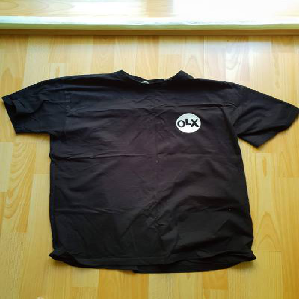

In [16]:
load_img(fullname, target_size=(299, 299))

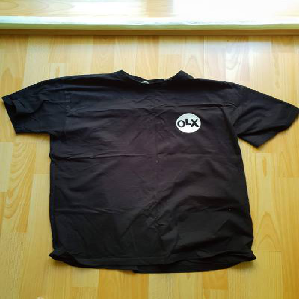

In [17]:
# we can save an image into a variable

img = load_img(fullname, target_size=(299, 299))
img

In [18]:
# the library for processing images is called PIL

print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F42EF616FD0>


In [19]:
# we can transform this image into an numpy array

x = np.array(img)
np.array(img)

# each of the lists is a combination of RGB values (from 0 to 255)
# 177 - R, 168 - G, 99 - B

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [20]:
# the shape of this image is 299*299*3
# 150*150 are the size, 3 stands for 3 channels (RGB - Red, Green, Blue)

np.array(img).shape

(299, 299, 3)

# Pre-Trained Convolutional Neural Networks

Let's apply a pre-trained neural network with imagenet classes.

We'll use Xception, but any other architecture will work as well.

Check here for a list of available models:

* https://keras.io/api/applications/
* https://www.tensorflow.org/api_docs/python/tf/keras/applications

We'll need to import 3 things:

* the model itself (`Xception`)
* the `preprocess_input` function that takes an image and prepares it
* the `decode_predictions` that converts the predictions of the model into human-readable classes

In [5]:
# the actual model, we use Xception architecture
from tensorflow.keras.applications.xception import Xception
# function for preparing the image to be used by the model
from tensorflow.keras.applications.xception import preprocess_input
# a function for decoding the model’s prediction
from tensorflow.keras.applications.xception import decode_predictions

In [6]:
# creating the model

model = Xception(
    weights='imagenet', # use ImageNet pre-trained model
    input_shape=(299, 299, 3) # size of the input images: height, width, and the number of channels
)

In [23]:
# model expects a number of image, not just one
# so to check how it classifies our image we may create X

X = np.array([x])
X

array([[[[179, 171,  99],
         [179, 171,  99],
         [181, 173, 101],
         ...,
         [251, 253, 248],
         [251, 253, 248],
         [251, 253, 248]],

        [[188, 179, 110],
         [187, 178, 109],
         [186, 177, 108],
         ...,
         [251, 252, 247],
         [251, 252, 247],
         [251, 252, 246]],

        [[199, 189, 127],
         [200, 190, 128],
         [200, 190, 128],
         ...,
         [250, 251, 245],
         [250, 251, 245],
         [250, 251, 245]],

        ...,

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [183, 135,  24],
         [181, 133,  22],
         [183, 135,  24]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [182, 134,  23],
         [180, 132,  21],
         [182, 134,  23]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [181, 133,  22],
        

In [24]:
X.shape

# 1 stands for 1 image

(1, 299, 299, 3)

In [25]:
# pre-process input as the model expects input in certain format

X = preprocess_input(X)

In [105]:
# make a prediction

pred = model.predict(X)
pred.shape

1/1 [==============================] - 1s 883ms/step


(1, 1000)

In [106]:
# it has 1000 elements, because the ImageNet pre-trained model has 1000 classes

pred[0,:10]

array([0.0003238 , 0.00015736, 0.00021406, 0.00015296, 0.00024657,
       0.00030446, 0.00032349, 0.00014726, 0.00020487, 0.00014866],
      dtype=float32)

In [107]:
# to make sense of this output, we need to decode it
# the output will show top classes in terms of probabilities 
# the link along the top classes, shows all the ImageNet available classes (no t-shirts)

decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792446),
  ('n02916936', 'bulletproof_vest', 0.03960038),
  ('n04370456', 'sweatshirt', 0.03529962),
  ('n03710637', 'maillot', 0.01088414),
  ('n04525038', 'velvet', 0.0018057632)]]

# Transfer learning

* https://poloclub.github.io/cnn-explainer/
* https://cs231n.github.io/convolutional-networks/

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# builds image generator for training (takes preprocessing input function)

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [9]:
# we have a generator, so we need to point it to the directory with the data using flow_from_directory method

train_ds = train_gen.flow_from_directory(
    "clothing-dataset-small/train", # loads images from the train directory
    target_size=(150, 150),
    batch_size=32, # loads the images in batches of 32 images
)

Found 3068 images belonging to 10 classes.


In [10]:
# doing the same for validation dataset

validation_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [11]:
val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
)

Found 341 images belonging to 10 classes.


In [113]:
# we may check what it generates
# there are 10 classes with names inferred from folder names inside thet train folder

train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [114]:
# we can also check that it generates two arrays, X and y
# next() will show us the next batch

X, y = next(train_ds)
X[:1]

array([[[[-0.05882353, -0.3490196 , -0.2862745 ],
         [ 0.3411765 ,  0.12156868,  0.11372554],
         [ 0.16078436, -0.11372548, -0.27058822],
         ...,
         [ 0.39607847,  0.3176471 ,  0.32549024],
         [ 0.34901965,  0.27058828,  0.27843142],
         [ 0.37254906,  0.2941177 ,  0.30196083]],

        [[ 0.06666672, -0.25490195, -0.14509803],
         [ 0.20000005, -0.01176471,  0.04313731],
         [ 0.02745104, -0.2235294 , -0.3098039 ],
         ...,
         [ 0.38823533,  0.30980396,  0.3176471 ],
         [ 0.36470592,  0.28627455,  0.2941177 ],
         [ 0.36470592,  0.28627455,  0.2941177 ]],

        [[ 0.16078436, -0.19999999, -0.11372548],
         [-0.04313725, -0.27843136, -0.19999999],
         [-0.05098039, -0.3098039 , -0.36470586],
         ...,
         [ 0.38823533,  0.30980396,  0.3176471 ],
         [ 0.38823533,  0.30980396,  0.3176471 ],
         [ 0.36470592,  0.28627455,  0.2941177 ]],

        ...,

        [[-0.70980394, -0.90588236, -0

In [12]:
base_model = Xception(
    weights='imagenet', # uses the model pretrained on ImageNet
    include_top=False, # keeps only the convolutional layers, without dense layers
    input_shape=(150, 150, 3), # images should be 150 × 150 with three channels.
)

In [13]:
# we don’t want to train the base model; attempting to do so will destroy all the filters.
# so, we “freeze” the base model by setting the trainable parameter to False:

base_model.trainable = False

In [117]:
# define expected image shape as input
inputs = keras.Input(shape=(150,150,3))

# feed inputs to the base model
base = base_model(inputs, training=False) # set False because the model to extract the high-level features

# extracts the vector representation: converts the output of base_model to a vector using pooling layer

# it's the same as:
# pooling = keras.layers.GlobalAveragePooling2D() - creates a pooling layer first
# vector = pooling(base) - connects it to base

vectors = keras.layers.GlobalAveragePooling2D()(base)

# adds a dense layer of size 10: one element for each class
outputs = keras.layers.Dense(10)(vectors)  # if use softmax, (10, activation='softmax') and from_logits=True in loss below

# combines the inputs and the outputs into a Keras model, i.e. creates model for training
model = keras.Model(inputs, outputs)

In [118]:
preds = model.predict(X)
preds.shape

1/1 [==============================] - 2s 2s/step


(32, 10)

In [119]:
# defines learning rate
learning_rate = 0.01

# creates optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# defines loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

# compiles the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy']) # evaluation metric accuracy

In [122]:
# train the model, validate it with validation data, and save the training history
history = model.fit(train_ds, epochs=3, validation_data=val_ds) # epochs=3 for the sake of speed

Epoch 1/3
96/96 [==============================] - 188s 2s/step - loss: 0.0261 - accuracy: 0.9945 - val_loss: 1.0376 - val_accuracy: 0.8094
Epoch 2/3
96/96 [==============================] - 190s 2s/step - loss: 0.0145 - accuracy: 0.9990 - val_loss: 0.9900 - val_accuracy: 0.8211
Epoch 3/3
96/96 [==============================] - 189s 2s/step - loss: 0.0151 - accuracy: 0.9990 - val_loss: 0.9975 - val_accuracy: 0.8123


In [123]:
history.history

{'loss': [0.02614009566605091, 0.014463896863162518, 0.01512838527560234],
 'accuracy': [0.9944589138031006, 0.9990221858024597, 0.9990221858024597],
 'val_loss': [1.0376015901565552, 0.9900269508361816, 0.9975339770317078],
 'val_accuracy': [0.8093841671943665, 0.8211143612861633, 0.8123167157173157]}

In [124]:
history.history['val_accuracy'] # checking train accuracy would be ['accuracy']

[0.8093841671943665, 0.8211143612861633, 0.8123167157173157]

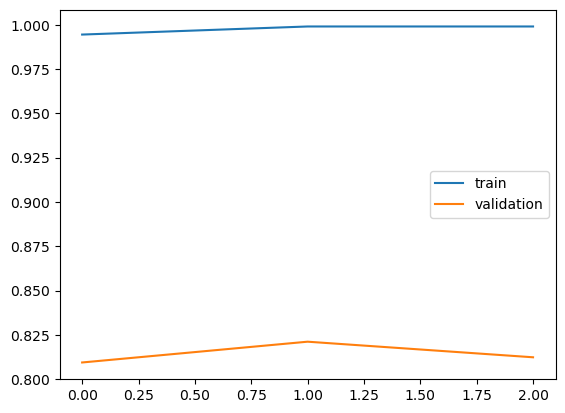

In [127]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
#plt.xticks(np.arange(10))

plt.legend()

Classes, function, and attributes:

* `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: to read the image data and make it useful for training/validation
* `flow_from_directory()`: method to read the images directly from the directory
* `next(train_ds)`: to unpack features and target variables
* `train_ds.class_indices`: attribute to get classes according to the directory structure
* `GlobalAveragePooling2D()`: accepts 4D tensor as input and operates the mean on the height and width dimensionalities for all the channels and returns vector representation of all images
* `CategoricalCrossentropy()`: method to produces a one-hot array containing the probable match for each category in multi classification
* `model.fit()`: method to train model
* `epochs`: number of iterations over all of the training data
* `history.history`: history attribute is a dictionary recording loss and metrics values (accuracy in our case) for at each epoch

# Adjusting the learning rate

In [128]:
# function to create model
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [130]:
# dictionary to store history with different learning rates
scores = {}

# list of learning rates
lrs = [0.001, 0.01, 0.1]

for lr in lrs:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=3, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.001
Epoch 1/3
96/96 [==============================] - 194s 2s/step - loss: 1.0718 - accuracy: 0.6483 - val_loss: 0.7149 - val_accuracy: 0.7654
Epoch 2/3
96/96 [==============================] - 193s 2s/step - loss: 0.6256 - accuracy: 0.7829 - val_loss: 0.6164 - val_accuracy: 0.8123
Epoch 3/3
96/96 [==============================] - 189s 2s/step - loss: 0.5063 - accuracy: 0.8387 - val_loss: 0.5968 - val_accuracy: 0.8211


0.01
Epoch 1/3
96/96 [==============================] - 194s 2s/step - loss: 1.2813 - accuracy: 0.6780 - val_loss: 0.8064 - val_accuracy: 0.7713
Epoch 2/3
96/96 [==============================] - 194s 2s/step - loss: 0.5110 - accuracy: 0.8357 - val_loss: 0.8494 - val_accuracy: 0.8035
Epoch 3/3
96/96 [==============================] - 194s 2s/step - loss: 0.3940 - accuracy: 0.8647 - val_loss: 0.8421 - val_accuracy: 0.7947


0.1
Epoch 1/3
96/96 [==============================] - 198s 2s/step - loss: 11.3310 - accuracy: 0.6382 - val_loss: 7.7943 - val_accuracy: 0.7214


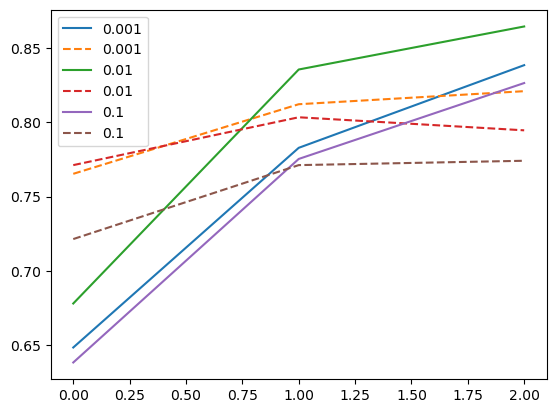

In [137]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)
    plt.plot(hist['val_accuracy'], label=lr, linestyle='dashed')
    #plt.xticks(np.arange(10))

plt.legend()

In [ ]:
# saving model

# model.save_weights('xception_v1_model.h5', save_format='h5')

In [138]:
# saving model with checkpoints from epochs

# "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5" is the filename
# {epoch:02d} is replaced by the number of the epoch
# {val_accuracy:.3f} is replaced by the validation accuracy

checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5", # Specifies the filename template for saving the models
    save_best_only=True, # Saves the model only when it’s better than previous iterations
    monitor="val_accuracy"# Uses the accuracy on validation for selecting the best model
)

In [139]:
model = make_model(learning_rate=0.001)

In [140]:
model.fit(
    train_ds,
    epochs=3,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/3
96/96 [==============================] - ETA: 0s - loss: 1.1147 - accuracy: 0.6340

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 196s 2s/step - loss: 1.1147 - accuracy: 0.6340 - val_loss: 0.7450 - val_accuracy: 0.7507
Epoch 2/3
96/96 [==============================] - 192s 2s/step - loss: 0.6328 - accuracy: 0.7888 - val_loss: 0.6416 - val_accuracy: 0.7742
Epoch 3/3
96/96 [==============================] - 187s 2s/step - loss: 0.5125 - accuracy: 0.8321 - val_loss: 0.5783 - val_accuracy: 0.7977


# Adding more layers

In [16]:
# Function to define model by adding new dense layer
def make_model(learning_rate=0.01, size_inner=100): # default layer size is 100
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # activation function 'relu'
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [13]:
# Experiement different number of inner layer with best learning rate
# Note: We should've added the checkpoint for training but for simplicity we are skipping it
learning_rate = 0.001

scores = {}

# List of inner layer sizes
sizes = [10, 100, 1000]

for size in sizes:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=3, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/3


2023-08-26 09:15:30.406511: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84934656 exceeds 10% of free system memory.
2023-08-26 09:15:30.506740: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84934656 exceeds 10% of free system memory.


96/96 [==============================] - 199s 2s/step - loss: 1.4607 - accuracy: 0.5078 - val_loss: 1.0077 - val_accuracy: 0.6628
Epoch 2/3
96/96 [==============================] - 189s 2s/step - loss: 0.8756 - accuracy: 0.6890 - val_loss: 0.7485 - val_accuracy: 0.7771
Epoch 3/3
96/96 [==============================] - 190s 2s/step - loss: 0.6554 - accuracy: 0.7829 - val_loss: 0.6478 - val_accuracy: 0.8035


100
Epoch 1/3
96/96 [==============================] - 189s 2s/step - loss: 0.9838 - accuracy: 0.6718 - val_loss: 0.6625 - val_accuracy: 0.7801
Epoch 2/3
96/96 [==============================] - 192s 2s/step - loss: 0.5137 - accuracy: 0.8266 - val_loss: 0.6517 - val_accuracy: 0.7771
Epoch 3/3
96/96 [==============================] - 184s 2s/step - loss: 0.3427 - accuracy: 0.8934 - val_loss: 0.5905 - val_accuracy: 0.8006


1000
Epoch 1/3
96/96 [==============================] - 192s 2s/step - loss: 0.9182 - accuracy: 0.6848 - val_loss: 0.5740 - val_accuracy: 0.8240
Epoch 2/3
96/96 [

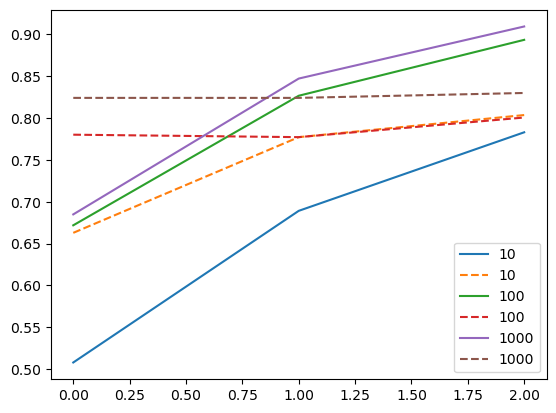

In [14]:
for size, hist in scores.items():
    plt.plot(hist['accuracy'], label=size)
    plt.plot(hist['val_accuracy'], label=size, linestyle='dashed')
    #plt.xticks(np.arange(10))

plt.legend()

# Regularization and Dropout

Dropout is a technique that prevents overfitting in neural networks by randomly dropping nodes of a layer during training. As a result, the trained model works as an ensemble model consisting of multiple neural networks.

In [18]:
# function to define model by adding new dense layer and dropout
def make_model(learning_rate=0.001, size_inner=1000, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # adding dropout layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [34]:
# Create checkpoint to save best model for version 3
filepath = './xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [37]:
# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.001
size = 1000

# Dict to store results
scores = {}

# List of dropout rates
droprates = [0.0, 0.2, 0.5]

for droprate in droprates:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       droprate=droprate)
    
    # Train for longer (epochs=4) cause of dropout regularization (ideally at least 30 epochs)
    history = model.fit(train_ds, epochs=4, validation_data=val_ds, callbacks=[checkpoint])
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/4
96/96 [==============================] - 191s 2s/step - loss: 0.9170 - accuracy: 0.6881 - val_loss: 0.6046 - val_accuracy: 0.7977
Epoch 2/4
96/96 [==============================] - 188s 2s/step - loss: 0.4325 - accuracy: 0.8462 - val_loss: 0.6244 - val_accuracy: 0.7859
Epoch 3/4
96/96 [==============================] - 190s 2s/step - loss: 0.2713 - accuracy: 0.9068 - val_loss: 0.6567 - val_accuracy: 0.7830
Epoch 4/4
96/96 [==============================] - 195s 2s/step - loss: 0.1525 - accuracy: 0.9531 - val_loss: 0.5597 - val_accuracy: 0.8416


0.2
Epoch 1/4
96/96 [==============================] - 195s 2s/step - loss: 0.9527 - accuracy: 0.6868 - val_loss: 0.6393 - val_accuracy: 0.7830
Epoch 2/4
96/96 [==============================] - 193s 2s/step - loss: 0.5003 - accuracy: 0.8207 - val_loss: 0.5966 - val_accuracy: 0.7771
Epoch 3/4
96/96 [==============================] - 191s 2s/step - loss: 0.3498 - accuracy: 0.8843 - val_loss: 0.5716 - val_accuracy: 0.8182
Epoch 4/4


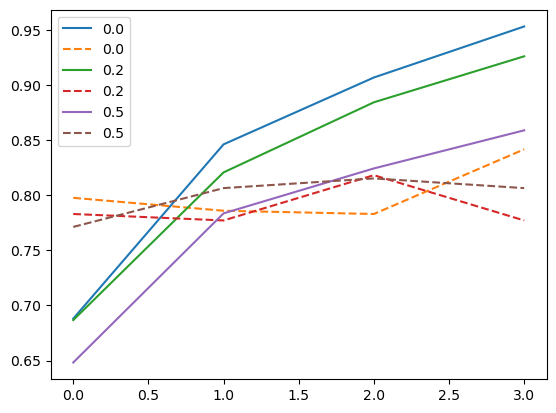

In [39]:
for droprate, hist in scores.items():
    plt.plot(hist['accuracy'], label=droprate)
    plt.plot(hist['val_accuracy'], label=droprate, linestyle='dashed')
    #plt.xticks(np.arange(10))

plt.legend()

# Data Augmentation

Data augmentation is a process of artifically increasing the amount of data by generating new images from existing images. This includes adding minor alterations to images by flipping, cropping, adding brightness and/or contrast, and many more.

Augmentations are hyperparameters: like many other hyperparameters, often times we need to test whether image augmentations are useful for the model or not. If the model doesn't improve or have same performance after certain epochs (let's say 20), in that case we don't use it.
Usually augmented data required training for longer.

In [13]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=30,
                               width_shift_range=10.0,
                               height_shift_range=10.0,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory(directory="clothing-dataset-small/train",
                                         target_size=(150,150),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [14]:
# validation dataset

validation_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
)

Found 341 images belonging to 10 classes.


In [20]:
# Set the best values of learning rate, inner layer size and dropout rate based on previous experiments
learning_rate = 0.001
size = 1000
droprate = 0.2

model = make_model(learning_rate=learning_rate,
                    size_inner=size,
                    droprate=droprate)

history = model.fit(train_ds, epochs=7, validation_data=val_ds) # w/o checkpoint

Epoch 1/7


2023-08-27 16:26:17.952136: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84934656 exceeds 10% of free system memory.
2023-08-27 16:26:18.048109: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84934656 exceeds 10% of free system memory.
2023-08-27 16:26:18.165225: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84934656 exceeds 10% of free system memory.


 1/96 [..............................] - ETA: 7:27 - loss: 2.4460 - accuracy: 0.0938

2023-08-27 16:26:20.019303: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84934656 exceeds 10% of free system memory.
2023-08-27 16:26:20.110588: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84934656 exceeds 10% of free system memory.


96/96 [==============================] - 212s 2s/step - loss: 1.3539 - accuracy: 0.5564 - val_loss: 0.8684 - val_accuracy: 0.7038
Epoch 2/7
96/96 [==============================] - 206s 2s/step - loss: 0.9642 - accuracy: 0.6816 - val_loss: 0.8234 - val_accuracy: 0.7331
Epoch 3/7
96/96 [==============================] - 202s 2s/step - loss: 0.8672 - accuracy: 0.6969 - val_loss: 0.8398 - val_accuracy: 0.7478
Epoch 4/7
96/96 [==============================] - 205s 2s/step - loss: 0.7910 - accuracy: 0.7239 - val_loss: 0.6632 - val_accuracy: 0.7859
Epoch 5/7
96/96 [==============================] - 208s 2s/step - loss: 0.7410 - accuracy: 0.7409 - val_loss: 0.6960 - val_accuracy: 0.7566
Epoch 6/7
96/96 [==============================] - 208s 2s/step - loss: 0.7232 - accuracy: 0.7539 - val_loss: 0.6532 - val_accuracy: 0.7859
Epoch 7/7
96/96 [==============================] - 209s 2s/step - loss: 0.6775 - accuracy: 0.7585 - val_loss: 0.7211 - val_accuracy: 0.7683


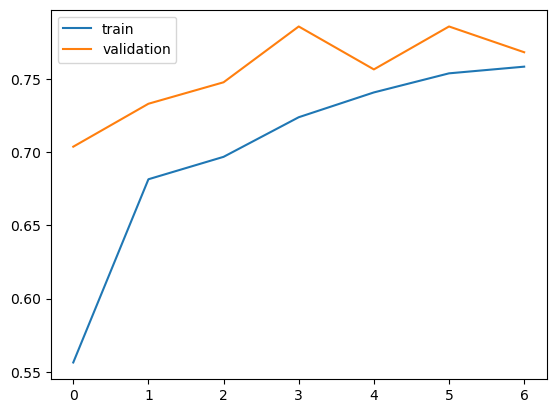

In [25]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
#plt.xticks(np.arange(7))

plt.legend()

# Training a Larger Model

In this section we increase the image input size from 150 to 299, reduce the amount of data augmentation parameters and lower the learning rate.

In [14]:
# function to define model by adding new dense layer and dropout
def make_model(input_size=150, learning_rate=0.001, size_inner=1000, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(input_size,input_size,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(input_size,input_size,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # adding dropout layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [19]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               #rotation_range=30,
                               #width_shift_range=10.0,
                               #height_shift_range=10.0,
                               #shear_range=10,
                               #zoom_range=0.1,
                               #vertical_flip=True
                              )

train_ds = train_gen.flow_from_directory(directory="clothing-dataset-small/train",
                                         target_size=(299,299),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [20]:
# validation dataset

validation_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = validation_gen.flow_from_directory(
    "clothing-dataset-small/validation",
    target_size=(299, 299),
    batch_size=32,
)

Found 341 images belonging to 10 classes.


In [21]:
# Create checkpoint to save best model for version 3
filepath = './xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [23]:
# Set the best values of learning rate, inner layer size and dropout rate based on previous experiments
learning_rate = 0.001
size = 1000
droprate = 0.2
input_size = 299

model = make_model(learning_rate=learning_rate,
                   input_size=input_size,
                    size_inner=size,
                    droprate=droprate)

history = model.fit(train_ds, epochs=7, validation_data=val_ds, callbacks=[checkpoint]) 

Epoch 1/7
96/96 [==============================] - ETA: 0s - loss: 0.6025 - accuracy: 0.7832

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 930s 10s/step - loss: 0.6025 - accuracy: 0.7832 - val_loss: 0.4337 - val_accuracy: 0.8358
Epoch 2/7
96/96 [==============================] - 927s 10s/step - loss: 0.3288 - accuracy: 0.8856 - val_loss: 0.4767 - val_accuracy: 0.8211
Epoch 3/7
96/96 [==============================] - 894s 9s/step - loss: 0.2703 - accuracy: 0.8986 - val_loss: 0.4171 - val_accuracy: 0.8446
Epoch 4/7
96/96 [==============================] - 895s 9s/step - loss: 0.2144 - accuracy: 0.9254 - val_loss: 0.4555 - val_accuracy: 0.8387
Epoch 5/7
96/96 [==============================] - 896s 9s/step - loss: 0.1583 - accuracy: 0.9410 - val_loss: 0.4172 - val_accuracy: 0.8739
Epoch 6/7
96/96 [==============================] - 986s 10s/step - loss: 0.1403 - accuracy: 0.9495 - val_loss: 0.4322 - val_accuracy: 0.8739
Epoch 7/7
96/96 [==============================] - 908s 9s/step - loss: 0.1042 - accuracy: 0.9641 - val_loss: 0.4357 - val_accuracy: 0.8710
